# Integrated Project

## Project Description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Table of contents:

1. [Open the data file and study the general information](#point1) <br>
2. Prepare the data: <br>
    2.1 [Replace the column names (make them lowercase)](#point2_1) <br>
    2.2 [Calculate the total sales for each game](#point2_2) <br>
    2.3 [Deal with missing values](#point2_3) <br>
    2.4 [TBD values](#point2_4) <br>
    2.5 [Convert the data to the required types](#point2_5) <br>
3. Analyze the data: <br>
    3.1 [Look at how many games were released in different years. Is the data for every period significant?](#point3_1) <br>
    3.2 [Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?](#point3_2) <br>
    3.3 [Determine what period you should take data for. The data should allow you to build a prognosis for 2017](#point3_3) <br>
    3.4 [Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms](#point3_4) <br>
    3.5 [Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms?](#point3_5) <br>
    3.6 [Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales](#point3_6) <br>
    3.7 [Keeping your conclusions in mind, compare the sales of the same games on other platforms](#point3_7) <br>
    3.8 [Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?](#point3_8) <br>
    3.9 User profile for each region: <br>
    - [For each region (NA, EU, JP), determine the top five platforms](#point3_9_1) <br>
    - [For each region (NA, EU, JP), determine the top five genres](#point3_9_2) <br>
    - [Do ESRB ratings affect sales in individual regions?](#point3_9_3) <br>
4. Test the following hypotheses: <br>
    4.1 [Average user ratings of the Xbox One and PC platforms are the same](#point4_1) <br>
    4.2 [Average user ratings for the Action and Sports genres are different](#point(4_2) <br>
5. [Overall Conclusion](#point5) 

<a id="point1"></a>
### Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv('/datasets/games.csv')

In [3]:
pd.set_option("display.max_columns", 40)

In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Every column name is clear, head of the dataframe looks nice, but a tail does not. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We have few columns with 'object' data type, so it's probably mixed. We also have a lot of missing values in important for our further investigation columns: 'Critic_Score', 'User_Score' and 'Rating'.

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Checking numerical values we see that we have games from 1980 to 2016. In 1980s and 1990s games market was very different from today so we probably won't consider this period in our prognosis. As for columns with sales now we see that there are a lot of zero values, almost 50% in every column and even more in Japan.

In [7]:
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [8]:
print(len(data[data['User_Score']=='tbd']) / len(data['User_Score']))

0.1450194436135208


From checking categorical and mixed variables we see that there are 11559 unique games, which is an impressive number. The game we see 12 times is Need for Speed: Most Wanted. 
There's a problem in 'User_Score' - a 'tbd' value, 14% of all games.

In [9]:
for i in data[['Platform', 'Genre', 'Rating']]:
    print(i, data[i].unique())

Platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Rating ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [10]:
for i in data[['Genre', 'Rating']]:
    print(i, data[i].isna().sum())

Genre 2
Rating 6766


We also have 31 unique platform, where PS2 has the most (2161) games. 
Top genre is action. Two missing values in genre are unsignificant.
We have 8 unique ratings and also 6766 missing values, which is a lot.

### Prepare the data

<a id="point2_1"></a>
#### Replace the column names (make them lowercase).

In [11]:
data.columns = data.columns.str.lower()
data.columns.str.lower()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id="point2_2"></a>
#### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [12]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [13]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<a id="point2_3"></a>
#### If necessary, decide how to deal with missing values:

In [14]:
data['name'] = data['name'].fillna(value='Undefined')
data['genre'] = data['genre'].fillna(value='Undefined')

In [15]:
data[data['name']=='Undefined']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,Undefined,GEN,1993.0,Undefined,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,Undefined,GEN,1993.0,Undefined,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


We have two rows that are totally screwed, so we might just drop them.

In [16]:
data.drop(data[data['name'] == 'Undefined'].index, inplace = True)

In [17]:
len(data)

16713

In [18]:
data['year_of_release'].isna().sum()

269

As for year missing, there are 269 rows, we can check if some of the games have year of release on other platforms.

In [19]:
games_list = data[['name', 'year_of_release']].pivot_table(index='name').reset_index()
games_list['year_of_release']=games_list['year_of_release'].astype(int)
games_list

,name,year_of_release
0,Beyblade Burst,2016
1,Fire Emblem Fates,2015
2,Frozen: Olaf's Quest,2013
3,Haikyu!! Cross Team Match!,2016
4,Tales of Xillia 2,2012
...,...,...
11421,thinkSMART FAMILY!,2010
11422,thinkSMART: Chess for Kids,2011
11423,uDraw Studio,2010
11424,uDraw Studio: Instant Artist,2011


In [20]:
data['year_of_release']=data['year_of_release'].fillna(value=0)

In [21]:
#the function works but it's super NOT efficient. maybe I need to get rid of "row" inside function, since apply with axis=1 already iterates over each row, how do I do that?
#it takes too much time, I considered not filling up missing years at all, or maybe manually for big sales games

def fill_year(row):
    name = row['name']
    year = row['year_of_release']
    if name in list(games_list['name'].unique()):
        recovered_year = games_list[games_list['name']==name]['year_of_release'].iloc[0]
    else:
        recovered_year = year
        
    if year == 0:        
        return recovered_year
    else:
        return year

In [22]:
data['year'] = data.apply(fill_year, axis=1) 

In [23]:
print(data[data['year_of_release']==0].shape[0])
print(data[data['year']==0].shape[0])

269
146


This is the best we can do automatically, next we will check games with missing year and significant sales and fill it manually by simply googling the year of release

In [24]:
data[data['year']==0].query('total_sales > 1') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year
475,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN,3.00,0.0
627,Rock Band,X360,0.0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47,0.0
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40,0.0
805,Rock Band,Wii,0.0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09,0.0
1142,Rock Band,PS3,0.0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62,0.0
1301,Triple Play 99,PS,0.0,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN,1.46,0.0
1506,Adventure,2600,0.0,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN,1.30,0.0
1585,Combat,2600,0.0,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN,1.25,0.0
1840,Rock Band,PS2,0.0,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T,1.12,0.0
1984,Legacy of Kain: Soul Reaver,PS,0.0,Action,0.58,0.40,0.0,0.07,91.0,9,T,1.05,0.0


In [25]:
data.loc[data.name=='wwe Smackdown vs. Raw 2006', 'year'] = 2006
data.loc[data.name=="Frogger's Adventures: Temple of the Frog", 'year'] = 2001
data.loc[data.name=='Triple Play 99', 'year'] = 1998
data.loc[data.name=='Adventure', 'year'] = 1980
data.loc[data.name=='Combat', 'year'] = 1980
data.loc[data.name=='Legacy of Kain: Soul Reaver', 'year'] = 1999
data.loc[data.name=='Donkey Kong Land III', 'year'] = 1997
data.loc[data.name=='Rock Band', 'year'] = 2008

In [26]:
data.query('total_sales > 1 & year == 0').empty

True

In [27]:
print(data[data['year']==0].shape[0])

135


In [28]:
data.drop(data[data['year'] == 0].index, inplace = True)
len(data)

16578

We still have 135 games with missing year, but their total sales are not that big to google every one of them, so we will just throw them out and work with what we have.

In [29]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8497
user_score         6638
rating             6704
total_sales           0
year                  0
dtype: int64

In [30]:
score_correlation = data[['user_score', 'critic_score']].query('user_score.notna() & user_score != "tbd" & critic_score.notna()')
score_correlation['user_score']=pd.to_numeric(score_correlation['user_score'])
score_correlation.corr()

,user_score,critic_score
user_score,1.00000,0.58013
critic_score,0.58013,1.00000


In [31]:
print('Percentage of Critic Score missing:', "{:.2%}".format(len(data[data['critic_score'].isna()]) / len(data['critic_score'])))
print('Percentage of User Score missing:', "{:.2%}".format(len(data[data['user_score'].isna()]) / len(data['user_score'])))
print('Percentage of Rating missing:', "{:.2%}".format(len(data[data['rating'].isna()]) / len(data['rating'])))

Percentage of Critic Score missing: 51.25%
Percentage of User Score missing: 40.04%
Percentage of Rating missing: 40.44%


The percentage of missing values in 'user_score', 'critic_score' and 'rating' is too high for it to be replaced, so we can't really do anything here. I checked for the correlation, and it's 0.58 - not high enough for replacing missing values based on values from another column. We will work with what we got but remember that the data can be not representative.

<a id="point2_4"></a>
#### TBD values

In [32]:
data[['year', 'user_score']].query('user_score=="tbd"').groupby('year').count().sort_values(by='user_score', ascending=False).reset_index()

,year,user_score
0,2009.0,405
1,2010.0,332
2,2008.0,330
3,2011.0,218
4,2007.0,193
5,2002.0,193
6,2006.0,127
7,2005.0,122
8,2004.0,107
9,2003.0,97


In [33]:
print('Percentage of "tbd" values in user score:', "{:.1%}".format(len(data[data['user_score']=="tbd"]) / len(data['user_score'])))

Percentage of "tbd" values in user score: 14.4%


In [34]:
data['user_score']=data['user_score'].replace('tbd', np.NaN)

We have games with 'tbd' in 'user_score' grouped by year, we see that 'tbd' is not relevant only for newest games, actually, biggest part of them are from years 2008-2010, so it would probably never be determined and we can replace 'tbd' with NaN for the purpose of calculations.

14.5% is pretty big, but for now we can't do anything with it, so we'll replace them with NaN

<a id="point2_5"></a>
#### Convert the data to the required types.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16578 entries, 0 to 16714
Data columns (total 13 columns):
name               16578 non-null object
platform           16578 non-null object
year_of_release    16578 non-null float64
genre              16578 non-null object
na_sales           16578 non-null float64
eu_sales           16578 non-null float64
jp_sales           16578 non-null float64
other_sales        16578 non-null float64
critic_score       8081 non-null float64
user_score         7545 non-null object
rating             9874 non-null object
total_sales        16578 non-null float64
year               16578 non-null float64
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


In [36]:
data['year']=data['year'].astype(int)

In [37]:
data['user_score']=pd.to_numeric(data['user_score'], downcast='float')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16578 entries, 0 to 16714
Data columns (total 13 columns):
name               16578 non-null object
platform           16578 non-null object
year_of_release    16578 non-null float64
genre              16578 non-null object
na_sales           16578 non-null float64
eu_sales           16578 non-null float64
jp_sales           16578 non-null float64
other_sales        16578 non-null float64
critic_score       8081 non-null float64
user_score         7545 non-null float32
rating             9874 non-null object
total_sales        16578 non-null float64
year               16578 non-null int64
dtypes: float32(1), float64(7), int64(1), object(4)
memory usage: 1.7+ MB


### Analyze the data

<a id="point3_1"></a>
#### Look at how many games were released in different years. Is the data for every period significant?

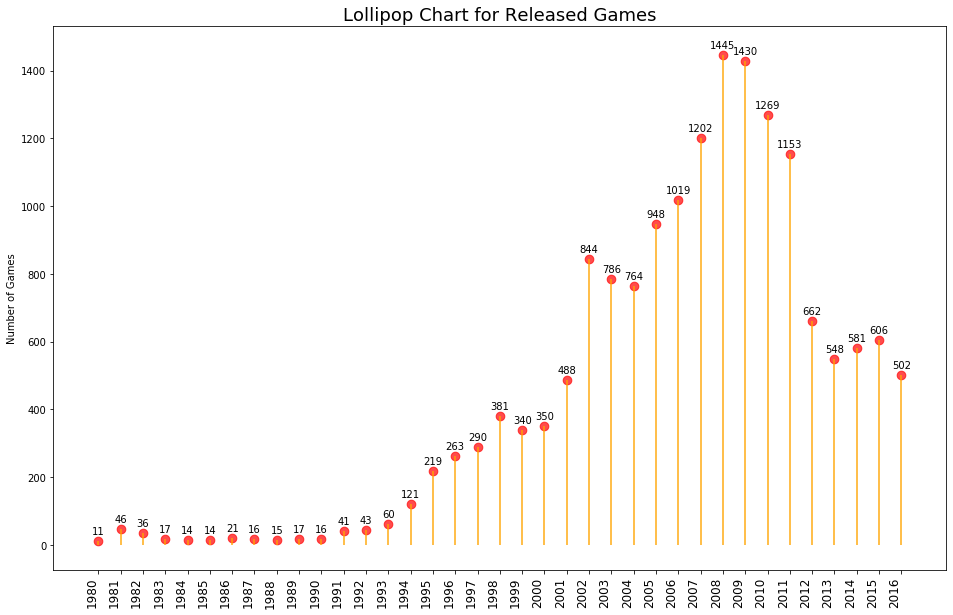

In [39]:
# Lollipop Chart

df1 = data[['year', 'name']].groupby('year').count().sort_values(by='year').reset_index()

fig, ax = plt.subplots(figsize=(16,10))   
ax.vlines(x=df1.year, ymin=0, ymax=df1.name, color='orange', alpha=0.7, linewidth=2)
ax.scatter(x=df1.year, y=df1.name, s=75, color='red', alpha=0.7)

ax.set_title('Lollipop Chart for Released Games', fontdict={'size':18})
ax.set_ylabel('Number of Games')
ax.set_xticks(df1.year)
ax.set_xticklabels(df1.year, rotation=90, fontdict={'horizontalalignment': 'right', 'size':12})

for row in df1.itertuples():
    ax.text(row.year, row.name+20, s=round(row.name, 2), horizontalalignment= 'center', fontsize=10)

plt.show()

As for number of games released - up till 1994 number is unsignificant (less than 100 games a year), in period 1995-2000 we have 220-350 games a year), in period 2001-2004 number is from 482 to 796 games a year), 2005-2011 has the biggest numbers (with peak at 2008-2009 with 1426-1524 games a year) ranging from 939 to 1136 games a year. From 2012 we see a drop with number of games from 502 to 653.

So depending on this graph we can say that period before 1995 is not significant at all, and period of 1995-2000 is not that significant.

<a id="point3_2"></a>
#### Look at how sales varied from platform to platform. 
#### Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
#### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [40]:
top_platforms = data[['platform', 'total_sales']].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
top_platforms = top_platforms[0:7]
top_platforms

,platform,total_sales
0,PS2,1251.28
1,X360,969.08
2,PS3,936.81
3,Wii,905.40
4,DS,804.28
5,PS,730.09
6,GBA,316.13


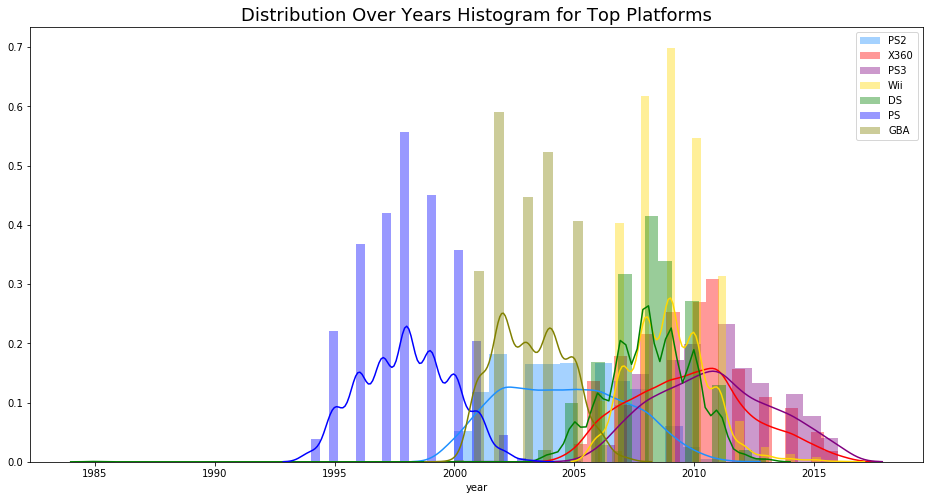

In [41]:
plt.subplots(figsize=(16,8))

sns.distplot(data.loc[data.platform=='PS2', "year"] , color="dodgerblue", label="PS2")
sns.distplot(data.loc[data.platform=='X360', "year"] , color="red", label="X360")
sns.distplot(data.loc[data.platform=='PS3', "year"] , color="purple", label="PS3")
sns.distplot(data.loc[data.platform=='Wii', "year"] , color="gold", label="Wii")
sns.distplot(data.loc[data.platform=='DS', "year"] , color="green", label="DS")
sns.distplot(data.loc[data.platform=='PS', "year"] , color="blue", label="PS")
sns.distplot(data.loc[data.platform=='GBA', "year"] , color="olive", label="GBA")

plt.title('Distribution Over Years Histogram for Top Platforms', fontdict={'size':18})
plt.legend()
plt.show()

On this graph we see that the oldest platform from top7 is PS (was popular in 1994-2002), then comes PS2 (popular in 1999-2010), then we have GBA (popular in 2000-2017), DS (popular in 2004-2012), X360 (popular in 2005-2015), PS3 (2006-2016) and the newest one is Wii (popular in 2006-2012).

Basically exept for X360, PS3 and Wii, other platforms have zero sales for now. PS and PS2 were oldest versions of PS3, and GBA is "the oldest" version of DS.

On average, we see that it takes around 7-8 years to appear and fade.

<a id="point3_3"></a>
#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
#### Work only with the data that you've decided is relevant. Disregard the data for previous years.

Looking at two previous graphs we decide to work only with data from 2010, so we will discard all the data from years before.

In [42]:
new_data = data.query('year > 2010')
new_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year
2126,Mass Effect 3,PC,2012.0,Role-Playing,0.40,0.44,0.00,0.12,89.0,5.5,M,0.96,2012
10777,Shovel Knight,WiiU,2015.0,Platform,0.05,0.04,0.00,0.01,88.0,8.3,E,0.10,2015
4706,Call of Duty: Black Ops II,WiiU,2012.0,Shooter,0.20,0.18,0.00,0.03,81.0,6.9,M,0.41,2012
2760,[Prototype 2],PS3,2012.0,Action,0.36,0.28,0.00,0.10,79.0,6.8,M,0.74,2012
3157,Dishonored 2,PS4,2016.0,Action,0.22,0.32,0.00,0.10,88.0,7.7,M,0.64,2016
13311,Rock Band Country Track Pack 2,X360,2011.0,Misc,0.04,0.00,0.00,0.00,NaN,NaN,E10+,0.04,2011
9719,Lego Star Wars: The Force Awakens,3DS,2016.0,Action,0.04,0.07,0.01,0.01,NaN,7.8,E10+,0.13,2016
3488,Phineas and Ferb: Across the 2nd Dimension,Wii,2011.0,Action,0.35,0.18,0.00,0.05,76.0,8.3,E10+,0.58,2011
8198,NBA Live 16,PS4,2015.0,Sports,0.10,0.04,0.00,0.03,59.0,6.1,E,0.17,2015
16010,Adventure Time: The Secret of the Nameless,3DS,2014.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,2014


In [43]:
len(new_data)

4052

In [44]:
new_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       2223
user_score         2004
rating             1717
total_sales           0
year                  0
dtype: int64

In [45]:
print('Percentage of Critic Score missing in new data:', "{:.2%}".format(len(new_data[new_data['critic_score'].isna()]) / len(new_data['critic_score'])))
print('Percentage of User Score missing in new data:', "{:.2%}".format(len(new_data[new_data['user_score'].isna()]) / len(new_data['user_score'])))
print('Percentage of Rating missing in new data:', "{:.2%}".format(len(new_data[new_data['rating'].isna()]) / len(new_data['rating'])))

Percentage of Critic Score missing in new data: 54.86%
Percentage of User Score missing in new data: 49.46%
Percentage of Rating missing in new data: 42.37%


Percentage of missing values in new data is still very high and we can't do anything without screwing the data, so we will work with what we have, but it still can be not representative.

<a id="point3_4"></a>
#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [46]:
df2 = new_data.pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum').fillna(0).reset_index()
df2

platform,year,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2011,63.20,26.33,35.16,0.45,157.98,0.00,17.82,4.63,59.79,0.00,145.23,0.00
1,2012,51.76,11.67,23.45,0.00,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2,2013,56.57,1.54,13.01,0.00,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
3,2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
4,2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
5,2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [47]:
last_sales = df2[df2['year'] >= 2015]
last_sales

platform,year,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
4,2015,27.78,0.0,8.52,0.0,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
5,2016,15.14,0.0,5.25,0.0,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [48]:
last_sales.agg(['sum'])

,year,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
sum,4031,42.92,0.0,13.77,0.0,20.42,188.15,0.12,10.5,1.32,20.95,13.48,86.29


As for leading in sales platforms - data from 2016 is incomplete, so we will look at last 2 years together. The platform clearly leading in sales is PS4 with total of 188.15 millions. Second is XOne with 86.29 millions, and third is 3DS with almost 43 millions. We also have few smaller players: PS3, WiiU, X360 and PC (13.7 - 20.9 millions).

In [49]:
sales_changes = df2 - df2.shift(+1)
sales_changes.tail()

platform,year,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
1,1.0,-11.44,-14.66,-11.71,-0.45,-49.70,0.00,-9.87,11.56,-36.85,17.56,-44.51,0.00
2,1.0,4.81,-10.13,-10.44,0.00,4.97,25.99,-4.57,-5.60,-14.35,4.09,-12.14,18.96
3,1.0,-12.81,-1.54,0.27,0.00,-65.49,74.01,-3.14,1.31,-4.84,0.38,-53.84,35.11
4,1.0,-15.98,0.00,-4.76,0.00,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
5,1.0,-12.64,0.00,-3.27,0.00,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


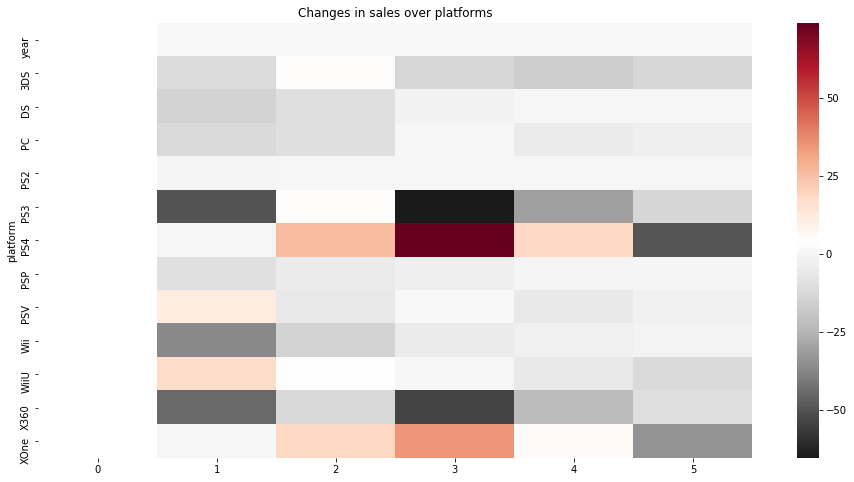

In [95]:
plt.figure(figsize=(16,8))
sns.heatmap(sales_changes.T, cmap='RdGy_r')
plt.title("Changes in sales over platforms")
plt.show()

We don't realy see growing platforms at this point, but our data from 2016 is incomplete, so that might change.
If we look at last few years, we see that few platforms are shrinking (by shrinking I understand platform going down in sales right now, and by alredy shrinked I understand platforms that have zero sales for at least two years after success).

So we see shrinking platforms such as 3DS, PS3, PSP, PSV, Wii, WiiU and X360. Some of them are still more profitable than the others, but all of them are slowly going down in sales over last years.

I think that potentially profitable are the newes ones, like PS4 and XOne, because they've just started the "lify cycle" of the platform, and eventhough we see overall decrease in 2016, it might be because of incomplete data, so we won't focus only on this year.

<a id="point3_5"></a>
#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [51]:
df3 = new_data.pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], aggfunc='sum').reset_index()
df3

,platform,year_of_release,total_sales
0,3DS,0.0,0.40
1,3DS,2011.0,63.20
2,3DS,2012.0,51.36
3,3DS,2013.0,56.57
4,3DS,2014.0,43.76
...,...,...,...
60,X360,2016.0,1.52
61,XOne,2013.0,18.96
62,XOne,2014.0,54.07
63,XOne,2015.0,60.14


In [52]:
order = df3.pivot_table(index = ['platform'], values=['total_sales'], aggfunc='sum').reset_index().sort_values(by=['total_sales'])['platform']
order

3      PS2
6      PSP
1       DS
7      PSV
9     WiiU
8      Wii
2       PC
11    XOne
0      3DS
5      PS4
10    X360
4      PS3
Name: platform, dtype: object

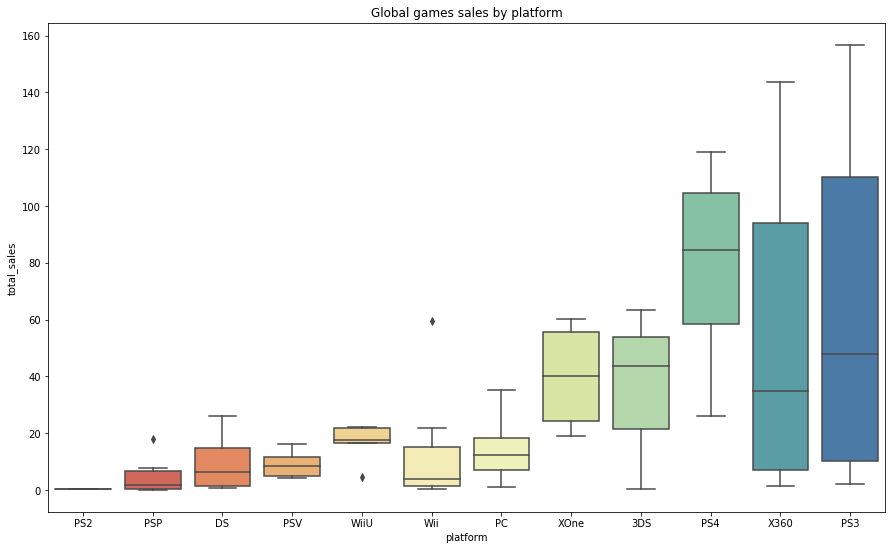

In [96]:
plt.figure(figsize=(15,9))

sns.boxplot(x='platform', y='total_sales', data=df3, order=order, palette='Spectral')
plt.title("Global games sales by platform")

plt.show()

The differences in sales are obviously significant, with few huge players on one side, platforms with smaller sales in the middle, and tiny platforms with low sales on the other side. 
Looking on average sales, we see that distribution is uneven in most cases, biggest platforms have bigger outliers. It's also interesting to compare platforms of same company but different generations: for example, we see that PS2 was more successfull, than PS3, although average sales of PS3 were a little higher.
Wii stands out with pretty low average sales, but according to distribution we see that the platform was very successfull in the past.

<a id="point3_6"></a>
#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [54]:
df4 = new_data[new_data['platform'] =="X360"].copy()
df4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,2013
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,2011
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68,2012
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,2013
66,Halo 4,X360,2012.0,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16540,Bullet Soul: Tama Tamashii,X360,2011.0,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011
16576,DoDonPachi Daifukkatsu: Black Label,X360,2011.0,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011
16613,Dragon Ball Z for Kinect,X360,2012.0,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01,2012
16647,Metal Gear Solid HD Edition,X360,2011.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,0.01,2011


In [55]:
print(len(df4))
df4.isna().sum() #high amount of games, number of missing values is relatively small

506


name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       207
user_score         138
rating             100
total_sales          0
year                 0
dtype: int64

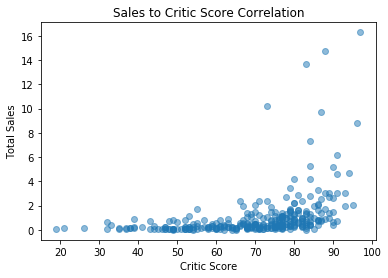

In [56]:
plt.scatter(x=df4['critic_score'], y=df4['total_sales'], alpha=.5)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Sales to Critic Score Correlation')
plt.show()

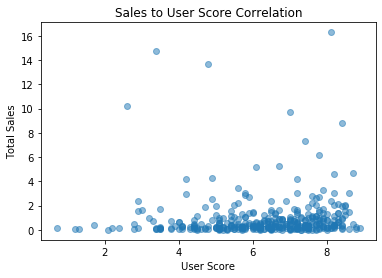

In [57]:
plt.scatter(x=df4['user_score'], y=df4['total_sales'], alpha=.5)
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Sales to User Score Correlation')
plt.show()

In [58]:
#Tried to put them on one plot, so needed to normalize 'user_score'

df4['user_score_norm'] = df4['user_score'] * 10

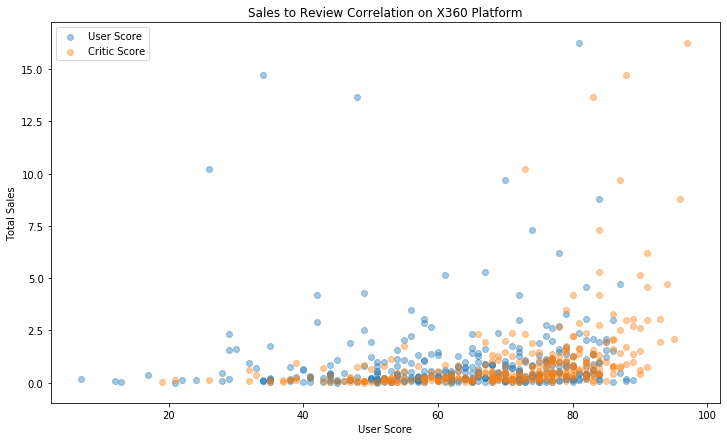

In [59]:
fig, ax = plt.subplots(figsize=(12,7))


plot1 = plt.scatter(x=df4['user_score_norm'], y=df4['total_sales'], alpha=.4)
plot2 = plt.scatter(x=df4['critic_score'], y=df4['total_sales'], alpha=.4)

plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Sales to Review Correlation on X360 Platform')
plt.legend([plot1,plot2],["User Score", "Critic Score"])
plt.show()

In [60]:
df4[['user_score_norm', 'critic_score']].describe()

,user_score_norm,critic_score
count,368.000000,299.000000
mean,63.388588,69.849498
std,15.610678,14.899690
min,7.000000,19.000000
25%,54.000000,61.000000
50%,66.000000,73.000000
75%,75.000000,80.000000
max,89.000000,97.000000


In [61]:
corr = df4['total_sales'].corr(df4['user_score'])
print('Correlation between sales and user score on X360 platform:', '{:.2f}'.format(corr))

Correlation between sales and user score on X360 platform: 0.04


Checking correlation, we see that it's 0.04 - meaning there's no correlation at all.

We see that generally users tend to give lower scores (7 to 90), while critics tend to give higher scores (19 to 98).

Generally we see that the higher is critic score (for more than 70) - the higher the sales. Also most of the games with unusually high sales got good reviews from critics.

As for user score - the connection is not that obvious. While games with higher score tend to have bigger sales, the graph doesn't rise the same way it does for 'critic_score'. Also we see that games with unusually great sales can have various user scores, even pretty low (25-60).

Overall we can say that critic score is more reliable source for prediction, and users sometimes give bad reviews that don't affect the total sales. 

<a id="point3_7"></a>
#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

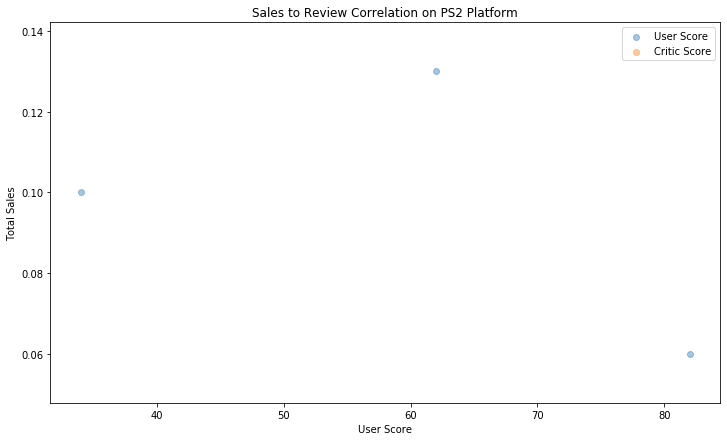

In [62]:
df5 = new_data.query('platform=="PS2"').copy()
df5['user_score_norm'] = df5['user_score'] * 10

fig, ax = plt.subplots(figsize=(12,7))


plot1 = plt.scatter(x=df5['user_score_norm'], y=df5['total_sales'], alpha=.4)
plot2 = plt.scatter(x=df5['critic_score'], y=df5['total_sales'], alpha=.4)

plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Sales to Review Correlation on PS2 Platform')
plt.legend([plot1,plot2],["User Score", "Critic Score"])
plt.show()

In [63]:
corr = df5['total_sales'].corr(df5['user_score'])
print('Correlation between sales and user score on PS2 platform:', '{:.2f}'.format(corr))

Correlation between sales and user score on PS2 platform: -0.49


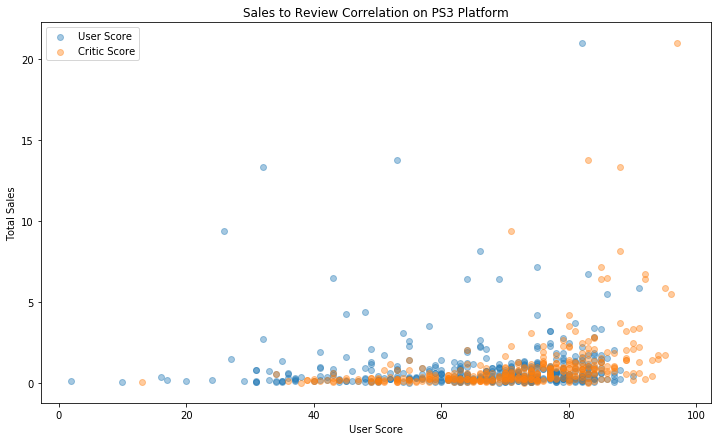

In [64]:
df6 = new_data.query('platform=="PS3"').copy()
df6['user_score_norm'] = df6['user_score'] * 10

fig, ax = plt.subplots(figsize=(12,7))


plot1 = plt.scatter(x=df6['user_score_norm'], y=df6['total_sales'], alpha=.4)
plot2 = plt.scatter(x=df6['critic_score'], y=df6['total_sales'], alpha=.4)

plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Sales to Review Correlation on PS3 Platform')
plt.legend([plot1,plot2],["User Score", "Critic Score"])
plt.show()

In [65]:
corr = df6['total_sales'].corr(df6['user_score'])
print('Correlation between sales and user score on PS3 platform:', '{:.2f}'.format(corr))

Correlation between sales and user score on PS3 platform: 0.01


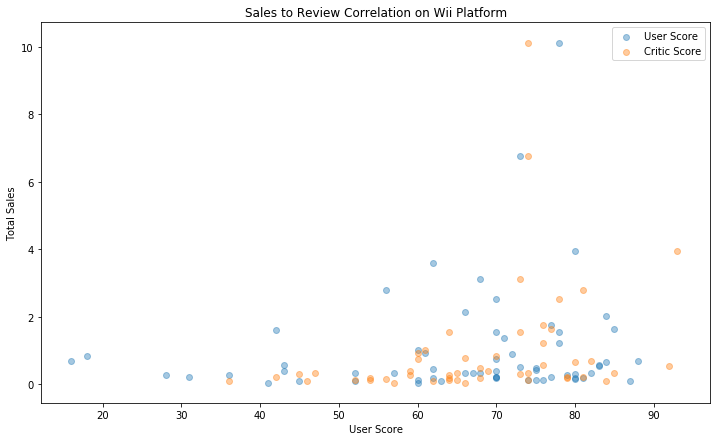

In [66]:
df7 = new_data.query('platform=="Wii"').copy()
df7['user_score_norm'] = df7['user_score'] * 10

fig, ax = plt.subplots(figsize=(12,7))


plot1 = plt.scatter(x=df7['user_score_norm'], y=df7['total_sales'], alpha=.4)
plot2 = plt.scatter(x=df7['critic_score'], y=df7['total_sales'], alpha=.4)

plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Sales to Review Correlation on Wii Platform')
plt.legend([plot1,plot2],["User Score", "Critic Score"])
plt.show()

In [67]:
corr = df7['total_sales'].corr(df7['user_score'])
print('Correlation between sales and user score on Wii platform:', '{:.2f}'.format(corr))

Correlation between sales and user score on Wii platform: 0.15


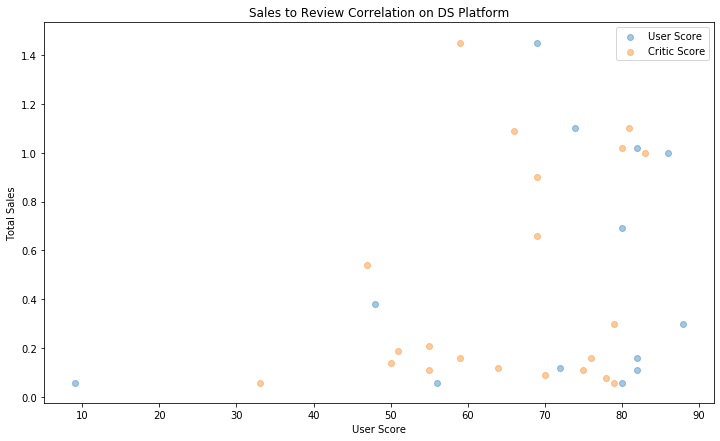

In [68]:
df8 = new_data.query('platform=="DS"').copy()
df8['user_score_norm'] = df8['user_score'] * 10

fig, ax = plt.subplots(figsize=(12,7))


plot1 = plt.scatter(x=df8['user_score_norm'], y=df8['total_sales'], alpha=.4)
plot2 = plt.scatter(x=df8['critic_score'], y=df8['total_sales'], alpha=.4)

plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Sales to Review Correlation on DS Platform')
plt.legend([plot1,plot2],["User Score", "Critic Score"])
plt.show()

In [69]:
corr = df8['total_sales'].corr(df8['user_score'])
print('Correlation between sales and user score on DS platform:', '{:.2f}'.format(corr))

Correlation between sales and user score on DS platform: 0.28


Checking other 5 big platforms, we see that the picture is dufferent - critic scores overall also tend to be little higher than user score for PS2, PS3 and Wii, but for DS the picture is opposite - user scores tend to be higher than critic scores.
Overall we can say that correlation between total sales and score exists everywhere, but is not the same for platforms, so we have to look at each of them individually.

Correlation coefficient for all the platforms varies from 0.01 to 0.28 ( -0.49 for platform with a small amount of data, so not that representative). That means that there's no correlation between amount of sales and user ratings.

<a id="point3_8"></a>
#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [70]:
df6 = new_data[['genre', 'total_sales']].pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
df6

,genre,total_sales
0,Action,565.22
1,Shooter,402.96
2,Role-Playing,245.63
3,Sports,237.40
4,Misc,139.91
5,Platform,88.68
6,Racing,88.31
7,Fighting,66.90
8,Simulation,50.26
9,Adventure,45.04


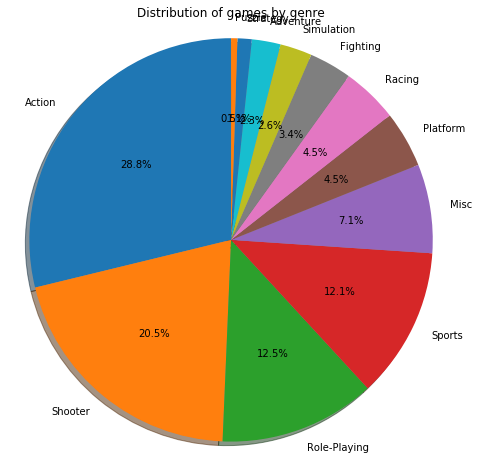

In [97]:
labels = df6['genre']
sizes = df6['total_sales']

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribution of games by genre")
plt.show()

Well, we see, that half of all sales (49.1%) happen in three leading genres: first Action with almost 30% of the market, then Shooter with 20.6%. Action and Shooter genres are very close, a lot of Action games are Shooters and vice versa. This is sort of "classic computer games genre", something that comes to mind even to someone not so familiar with world of computer games. What These genres have in common - adlenaline that user gets from playing, which is a nice safe way to get some.

That was about genres with high sales, next to them we also have 12.6% of "Role Playing" and 12.1% of "Sports". 

### User profile for each region

#### For each region (NA, EU, JP), determine:

In [72]:
regions_data = new_data[['na_sales', 'eu_sales', 'jp_sales','platform', 'genre', 'rating']]
regions_data

,na_sales,eu_sales,jp_sales,platform,genre,rating
16,7.02,9.09,0.98,PS3,Action,M
23,9.66,5.14,0.06,X360,Action,M
29,9.04,4.24,0.13,X360,Shooter,M
31,6.03,5.86,0.36,PS4,Shooter,NaN
33,5.28,4.19,4.35,3DS,Role-Playing,NaN
...,...,...,...,...,...,...
16703,0.00,0.00,0.01,PSV,Adventure,NaN
16707,0.00,0.00,0.01,PSV,Misc,NaN
16710,0.00,0.00,0.01,PS3,Action,NaN
16712,0.00,0.00,0.01,PSV,Adventure,NaN


<a id="point3_9_1"></a>
#### The top five platforms. Describe variations in their market shares from region to region.

In [73]:
NA_top_platforms=regions_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
NA_top_platforms=NA_top_platforms[0:5]
NA_top_platforms

,platform,na_sales
10,X360,228.18
4,PS3,168.96
5,PS4,108.74
11,XOne,93.12
0,3DS,82.83


In [74]:
EU_top_platforms=regions_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
EU_top_platforms=EU_top_platforms[0:5]
EU_top_platforms

,platform,eu_sales
4,PS3,164.15
5,PS4,141.09
10,X360,117.87
0,3DS,61.46
2,PC,57.38


In [75]:
JP_top_platforms=regions_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
JP_top_platforms=JP_top_platforms[0:5]
JP_top_platforms

,platform,jp_sales
0,3DS,100.62
4,PS3,49.40
6,PSP,24.28
7,PSV,21.84
5,PS4,15.96


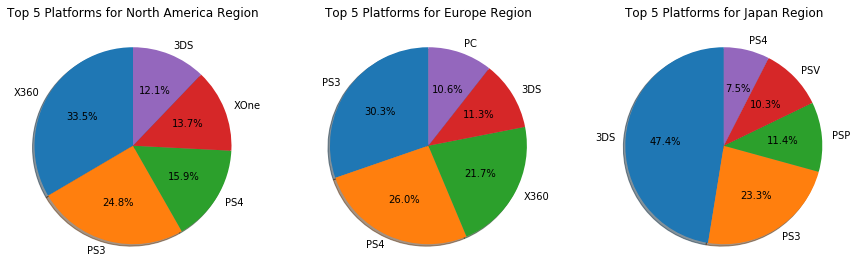

In [76]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15, 15)) 

labels = NA_top_platforms['platform']
values = NA_top_platforms['na_sales']
ax1.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Top 5 Platforms for North America Region')

labels = EU_top_platforms['platform']
values = EU_top_platforms['eu_sales']
ax2.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax2.set_title('Top 5 Platforms for Europe Region')

labels = JP_top_platforms['platform']
values = JP_top_platforms['jp_sales']
ax3.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax3.set_title('Top 5 Platforms for Japan Region')

fig.show()

We'll study top platforms according to their revenue.

The most popular platforms in North America are X360 and PS3 - together their share is 58% of the market, while PS4 and XOne have 16% and 13.7% shares and 3DS only has 12.2%.

In Europe top two platfoms are PS3 and PS4, together sharing 56.4% of the market, X360 is little less popular with 21.7%%, and then come 3DS and PC with shares around 11.4% and 10.5%.

As for Japan market - no doubt that it's totally different: biggest player is 3DS with 47.5% - half of the market! Then goes PS3 with 23.3%, and then we have two platforms we only see here: PSP with 11.3% share and PSV with 10.3% share and on the fifth place there's PS4 with only 7.5%.

Overall we see that in North America X360 has almost the same share as PS3 and PS4 together, while in Europe share of X360 is only 21.7%, while PS3 and PS4 together make 56.8% of market.
The picture is totally different in Japan, 3DS platform by itself takes almost half of the market. PS3 and PS4 together make a significant share of 30.8%, but X360 is not that popular in Japan.

<a id="point3_9_2"></a>
#### The top five genres. Explain the difference.

In [77]:
NA_top_genres=regions_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
NA_top_genres=NA_top_genres[0:5]
NA_top_genres

,genre,na_sales
0,Action,234.41
8,Shooter,194.45
10,Sports,108.70
7,Role-Playing,83.78
3,Misc,69.81


In [78]:
EU_top_genres=regions_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
EU_top_genres=EU_top_genres[0:5]
EU_top_genres

,genre,eu_sales
0,Action,202.17
8,Shooter,148.05
10,Sports,88.67
7,Role-Playing,62.30
6,Racing,40.58


In [79]:
JP_top_genres=regions_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
JP_top_genres=JP_top_genres[0:5]
JP_top_genres

,genre,jp_sales
7,Role-Playing,79.87
0,Action,63.63
3,Misc,17.85
2,Fighting,12.38
4,Platform,12.13


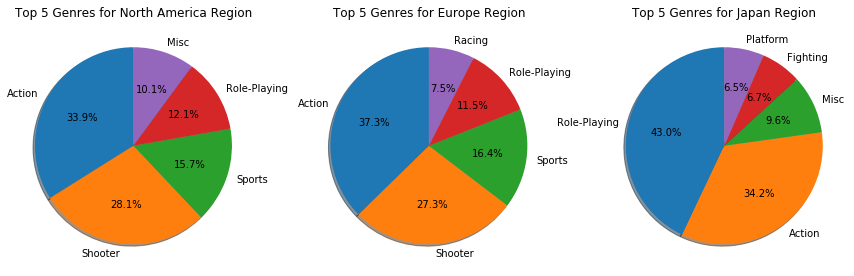

In [80]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15, 15)) 

labels = NA_top_genres['genre']
values = NA_top_genres['na_sales']
ax1.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax1.set_title('Top 5 Genres for North America Region')

labels = EU_top_genres['genre']
values = EU_top_genres['eu_sales']
ax2.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax2.set_title('Top 5 Genres for Europe Region')

labels = JP_top_genres['genre']
values = JP_top_genres['jp_sales']
ax3.pie(values,labels = labels,autopct = '%1.1f%%',shadow=True, startangle=90)
ax3.set_title('Top 5 Genres for Japan Region')

fig.show()

We see that top 4 genres for North America and Europe are identical with similar market shares: Action, Sports, Shooter, Misc, the only difference is that in North America fifth popular genre is Role-Playing, and in Europe it's Racing.
The picture is totally different for Japan - Role-Playing is the most popular genre with 43% market share, then we have Action, and Misc which we also see in another regions, and then go Fighting and Platform genre which is also unique for popular genres.

Basically, once again we see that North America and Europe's markets are close to each other, while Japan really stands out.

<a id="point3_9_3"></a>
#### Do ESRB ratings affect sales in individual regions?

In [81]:
rating = regions_data[['na_sales','eu_sales', 'jp_sales','rating']].pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc=sum)
for i in rating.columns:
    rating[i] = (rating[i] / rating[i].agg(sum)) * 100
rating.columns=['Europe', 'North America', 'Japan']
rating

#We get dataframe with percentage of share for each rating on each market

,Europe,North America,Japan
rating,,,
E,25.499003,34.136808,23.993743
E10+,14.351161,10.451373,16.904842
EC,0.000000,0.000000,0.059192
M,45.166274,24.336901,43.593213
RP,0.005390,0.000000,0.000000
T,14.978171,31.074919,15.449011


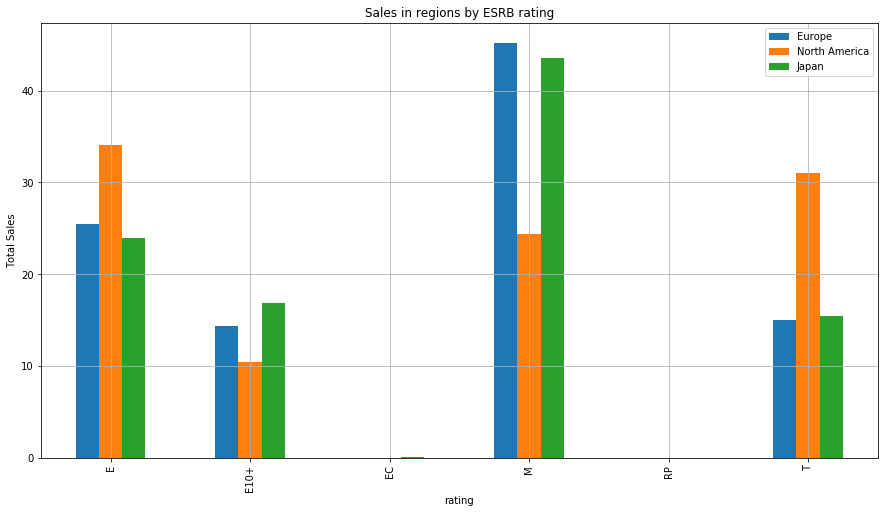

In [99]:
rating.plot(kind="bar", figsize=(15,8), grid=True)
plt.title("Sales in regions by ESRB rating")
plt.ylabel("Total Sales")
plt.show()

We see that there are three rating categories with less popularity (their share of the market is less than 1%): Adults Only, Early Childhood and Rating Pending, which is basically 'tbd' of ratings, so we will focus on ratings with significant shares.

We have E (Everyone 3+), E10+ (Everyone 10+), T (Teen 13+) and M (Mature 17+). The rating with most share is E, having share of around 40%, little bit more in North America. The rating with the least share here is E10+, around 10% of market for every region. As for Teen and Mature - in Europe and Japan they have similar shares (around 22-27%, let's say), Mature has bigger share than Teen. In North America it's quite different - Teen has 30% share while Mature has only 14%.

First of all, same game can be assigned different ESRB rating in different countries, and there also can be rules about ads for Mature games, for example, and that's why we see such difference in North America market.

### Test the following hypotheses:
Set the alpha threshold value yourself.

<a id="point4_1"></a>
#### Average user ratings of the Xbox One and PC platforms are the same

In [83]:
ratings_pc=new_data[['platform','user_score']].query('platform=="PC"').copy()
ratings_pc.sample(5)

,platform,user_score
12455,PC,6.8
959,PC,4.8
13958,PC,4.0
16062,PC,7.6
16443,PC,NaN


In [84]:
ratings_xone=new_data[['platform','user_score']].query('platform=="XOne"').copy()
ratings_xone.sample(5)

,platform,user_score
9232,XOne,NaN
9120,XOne,7.3
7672,XOne,NaN
13384,XOne,6.1
5321,XOne,6.6


In [85]:
pc_rating = ratings_pc['user_score']
xone_rating = ratings_xone['user_score']
print('User rating on PC:')
print(pc_rating.describe())
print()
print('Average user rating on PC:', pc_rating.mean())
print('Variance for average user rating on PC:', np.var(pc_rating))
print()
print('User rating on Xone:')
print(xone_rating.describe())
print()
print('Average user rating on XOne:', xone_rating.mean())
print('Variance for average user rating on XOne:', np.var(xone_rating))

User rating on PC:
count    314.000000
mean       6.466242
std        1.604986
min        1.400000
25%        5.600000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Average user rating on PC: 6.466242
Variance for average user rating on PC: 2.5677776

User rating on Xone:
count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Average user rating on XOne: 6.5214286
Variance for average user rating on XOne: 1.8965188


In [87]:
pc_desc=pc_rating.describe()
print((pc_desc['75%'] - pc_desc['25%']) * 1.5 + pc_desc['75%']) #How can upper fence for outliers be higher than max value?

10.84999966621399


In [88]:
pc_rating=pc_rating.notna()
xone_rating=xone_rating.notna()

In [89]:
alpha = .05

results1 = st.ttest_ind(pc_rating, xone_rating, equal_var=False) #run the t-test for two statistical populations whith different variances

print('p-value:', results1.pvalue)
if (results1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.10663854361201375
We can't reject the null hypothesis


We are testing the hypothesis on average user ratings on Xbox One and PC platforms. Our null hypothesis is that the average user ratings are the same. Our alternative hypothesis is that average user ratings differ. We set alpha value to 5% (also tried 10% because the data is incomplete, still got the same results).

After running the statistical test we see that the data provided sufficient evidence, given the significance level we selected, to not to reject the null hypothesis. Therefore, we can conclude that average user rating is the same on Xbox One and PC platforms . Looking at the numbers provided by the sample we took, we see that average rating of PC user is 6.45, and average rating of Xbox One is 6.52.

<a id="point4_2"></a>
#### Average user ratings for the Action and Sports genres are different

In [90]:
ratings_action=new_data[['genre','user_score']].query('genre=="Action"').copy()
ratings_action.sample(5)

,genre,user_score
12456,Action,7.9
16388,Action,NaN
11951,Action,NaN
16307,Action,NaN
4471,Action,5.0


In [91]:
ratings_sports=new_data[['genre','user_score']].query('genre=="Sports"').copy()
ratings_sports.sample(5)

,genre,user_score
14150,Sports,NaN
10861,Sports,6.5
5262,Sports,6.2
571,Sports,5.5
2210,Sports,6.2


In [92]:
action_r = ratings_action['user_score']
sports_r = ratings_sports['user_score']
print('User rating for Action Genre:')
print(action_r.describe())
print()
print('Average user rating for Action Genre:', action_r.mean())
print('Variance for average user rating for Action Genre:', np.var(action_r))
print()
print('User rating for Sports Genre:')
print(sports_r.describe())
print()
print('Average user rating for Sports Genre:', sports_r.mean())
print('Variance for average user rating for Sports Genre:', np.var(sports_r))

User rating for Action Genre:
count    675.000000
mean       6.783852
std        1.342157
min        1.600000
25%        6.100000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Average user rating for Action Genre: 6.783852
Variance for average user rating for Action Genre: 1.798717

User rating for Sports Genre:
count    246.000000
mean       5.650813
std        1.697796
min        0.200000
25%        4.400000
50%        6.000000
75%        6.900000
max        8.800000
Name: user_score, dtype: float64

Average user rating for Sports Genre: 5.650813
Variance for average user rating for Sports Genre: 2.870792


In [93]:
action_r=action_r.notna()
sports_r=sports_r.notna()

In [94]:
alpha = .05

results1 = st.ttest_ind(action_r, sports_r, equal_var=False) #run the t-test for two statistical populations whith different variances

print('p-value:', results1.pvalue)
if (results1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.00017410755763694902
We reject the null hypothesis


We are testing if average user rating are different for Action and Sports genres. Our null hypothesis is that average user ratings are the same. Our alternative hypothesis is that average user ratings differ. We set alpha value to 5%, we don't need 1% precision here.

After running the statistical test we see that the data provided sufficient evidence, given the significance level we selected, to reject the null hypothesis. Therefore, average user ratings for Action and Sports genres differ, and if we'll look at numbers provided by the sample we have, we see that average user rating for Action genre is 6.7, while for Sports genre it's 5.6.

<a id="point5"></a>
### General conclusion

After trying to deal with all the missing values, looking at all the graphs, testing our hypotheses we come to few conclusions.
First, the platform market is basically divided between few big players: Microsoft with Xbox, Sony with PlayStation, and Nintendo with both Wii and DS. So here we can say that potentially successfull game should be for at least one of these platforms.

As for genre - people mostly look for impressions and some adrenaline, so no surprise that most popular genres are Action, Shooter and Sports, so potentially winning game will probably be of one of these genres.

In addition, it's very important to understand what region we are talking about, because said here is relevant for big markets such as Europe and North America, but if we are looking for potentially big games in Japan - criteria will be different.

So, taking all this in mind, I would pay attention for games in Action/Sports genre coming out for XOne, PS4 and maybe check Wii also.

UPD: Since we took slice of data fro 2010 instead of from 2000, overall conclusions differ a little.

For North America and Europe region I would recommend to pay attention on Action/Shooter games coming out on XOne and PS4 (both rising platforms), and for Japan market I would recommend to pay attention to Role Playing and Action Games coming out for 3DS platform.